In [ ]:
!pip install requests pandas geopandas matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from shapely.geometry import Point

In [ ]:
file_path1 = "/content/drive/MyDrive/Session CSVs/2020-building-footprints.geojson"
gdf = gpd.read_file(file_path1)

In [ ]:
file_path2 = "/content/drive/MyDrive/Session CSVs/buildings-with-name-age-size-accessibility-and-bicycle-facilities.geojson"
pldf = gpd.read_file(file_path2)

# BUILDINGS

In [ ]:
# Remove specified columns
columns_to_drop = ['roof_type', 'tier', 'structure_max_elevation', 'footprint_max_elevation', 'structure_min_elevation','footprint_type', 'footprint_extrusion', 'footprint_min_elevation', 'structure_extrusion']
gdf = gdf.drop(columns_to_drop, axis=1)

# Remove rows with NaN values
gdf = gdf.dropna()


In [ ]:
gdf

geo_point_2d property_id  \
0      {'lon': 144.9669486612548, 'lat': -37.81150694...      109953   
1      {'lon': 144.96675041712277, 'lat': -37.8112172...      105685   
2      {'lon': 144.96674141511818, 'lat': -37.8111976...      105685   
3      {'lon': 144.99047343448228, 'lat': -37.8119959...      104550   
4      {'lon': 144.99072530059686, 'lat': -37.8118892...      104870   
...                                                  ...         ...   
37745  {'lon': 144.9524455806914, 'lat': -37.80263718...      110811   
37746  {'lon': 144.9524399989778, 'lat': -37.80266888...      110810   
37747  {'lon': 144.9524032357967, 'lat': -37.80271121...      110809   
37748  {'lon': 144.952430023987, 'lat': -37.802719276...      110809   
37749  {'lon': 144.95242502655168, 'lat': -37.8027510...      110808   

      structure_id                                           geometry  
0           812667  MULTIPOLYGON (((144.96706 -37.81155, 144.96700...  
1           818563  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...  
2           818563  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...  
3           805412  MULTIPOLYGON (((144.99052 -37.81198, 144.99044...  
4           813385  MULTIPOLYGON (((144.99074 -37.81186, 144.99072...  
...            ...                                                ...  
37745       800289  MULTIPOLYGON (((144.95246 -37.80265, 144.95247...  
37746       809400  MULTIPOLYGON (((144.95246 -37.80265, 144.95242...  
37747       816444  MULTIPOLYGON (((144.95250 -37.80270, 144.95231...  
37748       816444  MULTIPOLYGON (((144.95245 -37.80274, 144.95245...  
37749       807551  MULTIPOLYGON (((144.95245 -37.80274, 144.95241...  

[37736 rows x 4 columns]

In [ ]:
# Remove specified columns
columns_to_drop = ['base_property_id', 'building_name', 'street_address', 'construction_year', 'refurbished_year','number_of_floors_above_ground', 'accessibility_type','accessibility_type_description', 'bicycle_spaces','has_showers', 'location']
pldf = pldf.drop(columns_to_drop,axis=1)

# Remove rows with NaN values
pldf = pldf.dropna()

In [ ]:
pldf

census_year  block_id  property_id               clue_small_area  \
0             2012       435       101564  West Melbourne (Residential)   
1             2013       257       105523                       Carlton   
2             2013        74       105741               Melbourne (CBD)   
3             2012       432       101967  West Melbourne (Residential)   
4             2013        17       103927               Melbourne (CBD)   
...            ...       ...          ...                           ...   
263278        2013       234       103059                       Carlton   
263279        2012       516       109485                    Kensington   
263281        2013       232       109134                       Carlton   
263283        2012       535       100698                    Kensington   
263284        2013       218       102676                       Carlton   

               predominant_space_use  accessibility_rating  longitude  \
0                    House/Townhouse                   0.0   144.9553   
1                Unoccupied - Unused                   1.0   144.9609   
2       Parking - Commercial Covered                   3.0   144.9611   
3                Unoccupied - Unused                   3.0   144.9522   
4                            Storage                   1.0   144.9702   
...                              ...                   ...        ...   
263278               House/Townhouse                   0.0   144.9735   
263279               House/Townhouse                   0.0   144.9305   
263281               House/Townhouse                   1.0   144.9745   
263283               House/Townhouse                   0.0   144.9236   
263284               House/Townhouse                   0.0   144.9683   

        latitude                     geometry  
0       -37.8066  POINT (144.95530 -37.80660)  
1       -37.8033  POINT (144.96090 -37.80330)  
2       -37.8120  POINT (144.96110 -37.81200)  
3       -37.8073  POINT (144.95220 -37.80730)  
4       -37.8157  POINT (144.97020 -37.81570)  
...          ...                          ...  
263278  -37.7981  POINT (144.97350 -37.79810)  
263279  -37.7975  POINT (144.93050 -37.79750)  
263281  -37.7959  POINT (144.97450 -37.79590)  
263283  -37.7943  POINT (144.92360 -37.79430)  
263284  -37.7999  POINT (144.96830 -37.79990)  

[227727 rows x 9 columns]

In [ ]:
# Convert property_id column to string in both DataFrames
pldf['property_id'] = pldf['property_id'].astype(str)
gdf['property_id'] = gdf['property_id'].astype(str)

# Merge pldf and gdf based on property_id
merged_df = pd.merge(pldf, gdf, on='property_id')

# Remove duplicate rows based on 'property_id', 'longitude', and 'latitude' columns
merged_df = merged_df.drop_duplicates(subset=['property_id', 'longitude', 'latitude'])

# Reset index and drop old index column
merged_df = merged_df.reset_index(drop=True)

# Rename 'geometry_x' column to 'centroid'
merged_df = merged_df.rename(columns={'geometry_x': 'centroid'})

# Delete 'geo_point_2d' and 'structure_id' columns
merged_df = merged_df.drop(['geo_point_2d', 'structure_id'], axis=1)

In [ ]:
merged_df

census_year  block_id property_id               clue_small_area  \
0            2012       435      101564  West Melbourne (Residential)   
1            2003       435      101564  West Melbourne (Residential)   
2            2013       257      105523                       Carlton   
3            2004       257      105523                       Carlton   
4            2017       257      105523                       Carlton   
...           ...       ...         ...                           ...   
24142        2021       773      694345                     Docklands   
24143        2021       620      704479                East Melbourne   
24144        2021      2535      614886                    Kensington   
24145        2021      2542      615151                    Kensington   
24146        2021        78      580090               Melbourne (CBD)   

       predominant_space_use  accessibility_rating  longitude  latitude  \
0            House/Townhouse                   0.0   144.9553  -37.8066   
1            House/Townhouse                   0.0   144.9540  -37.8083   
2        Unoccupied - Unused                   1.0   144.9609  -37.8033   
3        Unoccupied - Unused                   1.0   144.9596  -37.8049   
4      Student Accommodation                   3.0   144.9610  -37.8033   
...                      ...                   ...        ...       ...   
24142        House/Townhouse                   0.0   144.9342  -37.8216   
24143  Residential Apartment                   3.0   144.9817  -37.8096   
24144        House/Townhouse                   0.0   144.9319  -37.7907   
24145        House/Townhouse                   0.0   144.9325  -37.7916   
24146                 Office                   0.0   144.9714  -37.8091   

                          centroid  \
0      POINT (144.95530 -37.80660)   
1      POINT (144.95400 -37.80830)   
2      POINT (144.96090 -37.80330)   
3      POINT (144.95960 -37.80490)   
4      POINT (144.96100 -37.80330)   
...                            ...   
24142  POINT (144.93420 -37.82160)   
24143  POINT (144.98170 -37.80960)   
24144  POINT (144.93190 -37.79070)   
24145  POINT (144.93250 -37.79160)   
24146  POINT (144.97140 -37.80910)   

                                              geometry_y  
0      MULTIPOLYGON (((144.95539 -37.80664, 144.95539...  
1      MULTIPOLYGON (((144.95539 -37.80664, 144.95539...  
2      MULTIPOLYGON (((144.96144 -37.80344, 144.96140...  
3      MULTIPOLYGON (((144.96144 -37.80344, 144.96140...  
4      MULTIPOLYGON (((144.96144 -37.80344, 144.96140...  
...                                                  ...  
24142  MULTIPOLYGON (((144.93425 -37.82164, 144.93427...  
24143  MULTIPOLYGON (((144.98155 -37.80959, 144.98154...  
24144  MULTIPOLYGON (((144.93193 -37.79065, 144.93186...  
24145  MULTIPOLYGON (((144.93252 -37.79159, 144.93243...  
24146  MULTIPOLYGON (((144.97185 -37.80932, 144.97185...  

[24147 rows x 10 columns]

In [ ]:
# Convert the merged DataFrame to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='centroid', crs="EPSG:4326")

# Save the merged DataFrame as a CSV file
merged_df.to_csv('/content/drive/MyDrive/Session CSVs/Buildings_filtered.csv', index=False)

# POIS + AMENITIES

In [ ]:
file_path3 = "/content/drive/MyDrive/Session CSVs/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor.geojson"
kkdf = gpd.read_file(file_path3)

In [ ]:
# Rename the 'theme' column to 'category'
kkdf = kkdf.rename(columns={'sub_theme': 'category'})

In [ ]:
kkdf

theme                                         category  \
0             Transport                                  Railway Station   
1             Mixed Use                            Retail/Office/Carpark   
2    Leisure/Recreation  Informal Outdoor Facility (Park/Garden/Reserve)   
3      Place of Worship                                           Church   
4      Place of Worship                                           Church   
..                  ...                                              ...   
237    Education Centre         School - Primary and Secondary Education   
238              Retail                                 Department Store   
239              Retail                                 Department Store   
240     Health Services                                 Medical Services   
241           Mixed Use                            Retail/Office/Carpark   

                          feature_name                     geometry  
0    Flemington Bridge Railway Station  POINT (144.93928 -37.78816)  
1                Council House 2 (CH2)  POINT (144.96664 -37.81426)  
2                Carlton Gardens South  POINT (144.97127 -37.80607)  
3                        Wesley Church  POINT (144.96817 -37.81016)  
4                 St Augustines Church  POINT (144.95486 -37.81697)  
..                                 ...                          ...  
237     Melbourne Girls Grammar School  POINT (144.98509 -37.83154)  
238                               Myer  POINT (144.96386 -37.81359)  
239                        David Jones  POINT (144.96437 -37.81331)  
240             Mercy Private Hospital  POINT (144.98444 -37.81190)  
241                  ANZ 'Gothic' Bank  POINT (144.96167 -37.81616)  

[242 rows x 4 columns]

In [ ]:
file_path4 = "/content/drive/MyDrive/Session CSVs/bars-and-pubs-with-patron-capacity.geojson"
ggdf = gpd.read_file(file_path4)

In [ ]:
# Create a list of columns to be dropped
columns_to_drop = ['base_property_id', 'building_address', 'trading_name', 'business_address', 'number_of_patrons', 'location']

# Drop the specified columns
ggdf = ggdf.drop(columns=columns_to_drop, axis=1)

# Create a new column 'category' with the value "Bar/Tavern/Pub" for all rows
ggdf['category'] = "Bar/Tavern/Pub"


In [ ]:
ggdf

census_year  block_id  property_id  clue_small_area  longitude  latitude  \
0           2002        11       108971  Melbourne (CBD)  144.95379 -37.82183   
1           2002        11       108972  Melbourne (CBD)  144.95393 -37.82215   
2           2002        13       108058  Melbourne (CBD)  144.96063 -37.82026   
3           2002        14       103172  Melbourne (CBD)  144.96300 -37.81906   
4           2002        15       103944  Melbourne (CBD)  144.96398 -37.81888   
...          ...       ...          ...              ...        ...       ...   
4397        2021      1103       558180        Docklands  144.94756 -37.81674   
4398        2021      1103       558180        Docklands  144.94756 -37.81674   
4399        2021      1104       576024        Docklands  144.94799 -37.81938   
4400        2021      1110       620318        Docklands  144.93914 -37.81372   
4401        2021      1112       103982        Docklands  144.95133 -37.82247   

                         geometry        category  
0     POINT (144.95379 -37.82183)  Bar/Tavern/Pub  
1     POINT (144.95393 -37.82215)  Bar/Tavern/Pub  
2     POINT (144.96063 -37.82026)  Bar/Tavern/Pub  
3     POINT (144.96300 -37.81906)  Bar/Tavern/Pub  
4     POINT (144.96398 -37.81888)  Bar/Tavern/Pub  
...                           ...             ...  
4397  POINT (144.94756 -37.81674)  Bar/Tavern/Pub  
4398  POINT (144.94756 -37.81674)  Bar/Tavern/Pub  
4399  POINT (144.94799 -37.81938)  Bar/Tavern/Pub  
4400  POINT (144.93914 -37.81372)  Bar/Tavern/Pub  
4401  POINT (144.95133 -37.82247)  Bar/Tavern/Pub  

[4402 rows x 8 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(15, 15))

# Plot the gdf polygons in grey color
gdf.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.5, alpha=0.8)

# Define a colormap for the category column with distinguishable colors
cmap = ListedColormap(sns.color_palette('husl', n_colors=len(set(kkdf['category'].unique()).union(set(ggdf['category'].unique()))))[::-1])

# Assign unique colors for each category
category_colors = {cat: cmap(i) for i, cat in enumerate(set(kkdf['category'].unique()).union(set(ggdf['category'].unique())))}

# Exclude these categories from the plot and legend
excluded_categories = {'Railway Station', 'Bridge', 'Retail/Residential', 'Dwelling (House)'}

for df in [kkdf, ggdf]:
    categories = df['category'].unique()
    for category in categories:
        if category in excluded_categories:
            continue

        color = category_colors[category]
        if category == "Bar/Tavern/Pub":
            size = 5
        else:
            size = 10
        df[df['category'] == category].plot(ax=ax, markersize=size, label=category, color=color, alpha=0.8)

# Create legend for the categories outside the plot, on the right side
# Make patches with rounded corners and curved stroke edges
legend_patches = [Patch(facecolor=color, edgecolor=color, label=cat, linewidth=1, joinstyle="round", capstyle="round") for cat, color in category_colors.items() if cat not in excluded_categories]
leg = ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)

ax.set_title("Melbourne's POIs")
ax.set_axis_off()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

def km_to_degrees(km, latitude):
    earth_radius = 6371.01 * np.cos(np.radians(latitude))
    return km / (earth_radius * np.pi / 180)

distance_list = [('Cycling 5 minutes', 1.29), ('Cycling 10 minutes', 2.58), ('Cycling 15 minutes', 3.87)]

gdf = gdf.to_crs("EPSG:4326")
ggdf = ggdf.to_crs("EPSG:4326")
kkdf = kkdf.to_crs("EPSG:4326")

all_poi = pd.concat([ggdf, kkdf])

amenities_df = gdf.copy()

for col_name, distance_km in distance_list:
    amenities_df[col_name] = 0

for index, row in amenities_df.iterrows():
    centroid = row.geometry.centroid
    latitude = centroid.y

    for col_name, distance_km in distance_list:
        buffer = centroid.buffer(km_to_degrees(distance_km, latitude))
        count = all_poi[all_poi.intersects(buffer)].shape[0]
        amenities_df.at[index, col_name] = count

amenities_df.head()


geo_point_2d property_id structure_id  \
0  {'lon': 144.9669486612548, 'lat': -37.81150694...      109953       812667   
1  {'lon': 144.96675041712277, 'lat': -37.8112172...      105685       818563   
2  {'lon': 144.96674141511818, 'lat': -37.8111976...      105685       818563   
3  {'lon': 144.99047343448228, 'lat': -37.8119959...      104550       805412   
4  {'lon': 144.99072530059686, 'lat': -37.8118892...      104870       813385   

                                            geometry  Cycling 5 minutes  \
0  MULTIPOLYGON (((144.96706 -37.81155, 144.96700...               3651   
1  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...               3686   
2  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...               3693   
3  MULTIPOLYGON (((144.99052 -37.81198, 144.99044...                 64   
4  MULTIPOLYGON (((144.99074 -37.81186, 144.99072...                 63   

   Cycling 10 minutes  Cycling 15 minutes  
0                4500                4610  
1                4501                4611  
2                4501                4611  
3                2566                4426  
4                2532                4413

In [ ]:
amenities_df

geo_point_2d property_id  \
0      {'lon': 144.9669486612548, 'lat': -37.81150694...      109953   
1      {'lon': 144.96675041712277, 'lat': -37.8112172...      105685   
2      {'lon': 144.96674141511818, 'lat': -37.8111976...      105685   
3      {'lon': 144.99047343448228, 'lat': -37.8119959...      104550   
4      {'lon': 144.99072530059686, 'lat': -37.8118892...      104870   
...                                                  ...         ...   
37745  {'lon': 144.9524455806914, 'lat': -37.80263718...      110811   
37746  {'lon': 144.9524399989778, 'lat': -37.80266888...      110810   
37747  {'lon': 144.9524032357967, 'lat': -37.80271121...      110809   
37748  {'lon': 144.952430023987, 'lat': -37.802719276...      110809   
37749  {'lon': 144.95242502655168, 'lat': -37.8027510...      110808   

      structure_id                                           geometry  \
0           812667  MULTIPOLYGON (((144.96706 -37.81155, 144.96700...   
1           818563  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...   
2           818563  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...   
3           805412  MULTIPOLYGON (((144.99052 -37.81198, 144.99044...   
4           813385  MULTIPOLYGON (((144.99074 -37.81186, 144.99072...   
...            ...                                                ...   
37745       800289  MULTIPOLYGON (((144.95246 -37.80265, 144.95247...   
37746       809400  MULTIPOLYGON (((144.95246 -37.80265, 144.95242...   
37747       816444  MULTIPOLYGON (((144.95250 -37.80270, 144.95231...   
37748       816444  MULTIPOLYGON (((144.95245 -37.80274, 144.95245...   
37749       807551  MULTIPOLYGON (((144.95245 -37.80274, 144.95241...   

       Cycling 5 minutes  Cycling 10 minutes  Cycling 15 minutes  
0                   3651                4500                4610  
1                   3686                4501                4611  
2                   3693                4501                4611  
3                     64                2566                4426  
4                     63                2532                4413  
...                  ...                 ...                 ...  
37745               1281                4471                4590  
37746               1281                4471                4590  
37747               1264                4471                4590  
37748               1281                4471                4590  
37749               1264                4471                4590  

[37736 rows x 7 columns]

<ipython-input-58-cb01f34648be>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color)


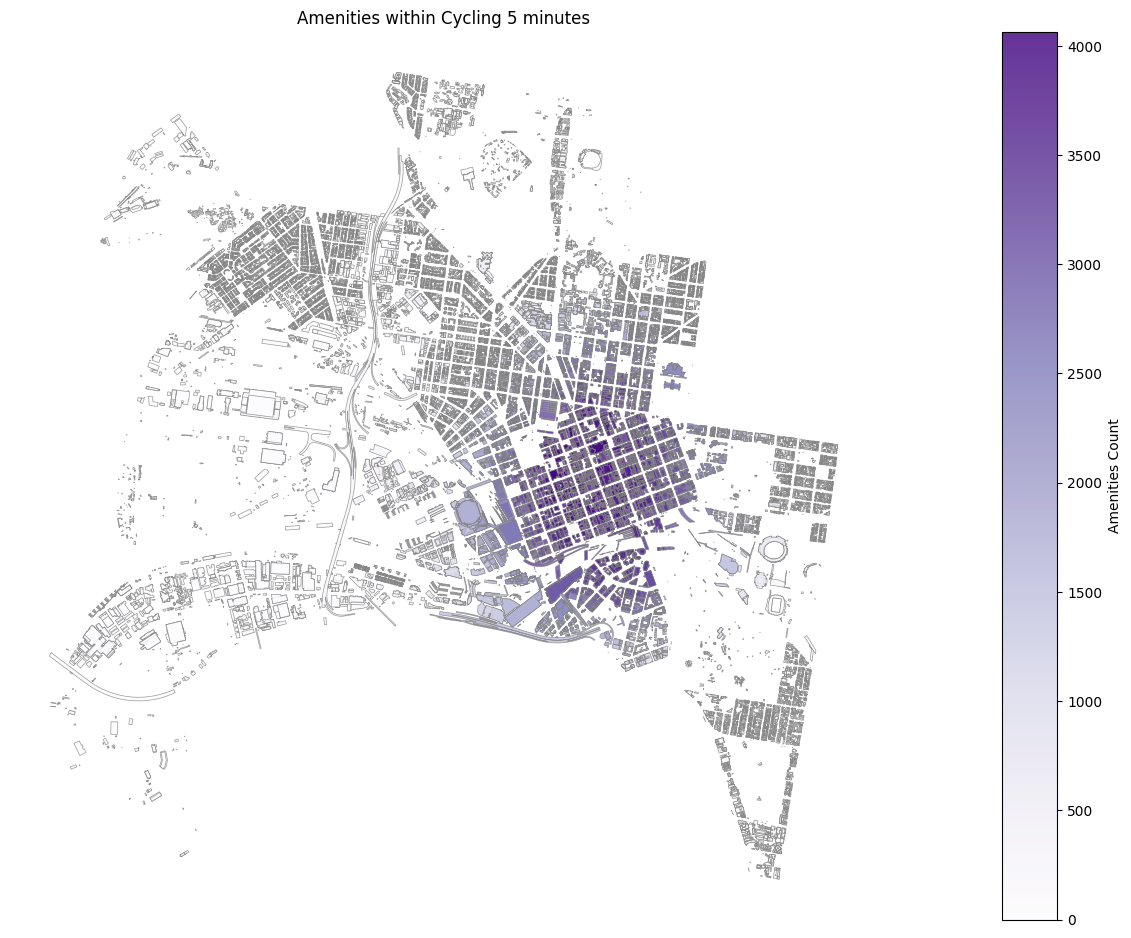

<ipython-input-58-cb01f34648be>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color)


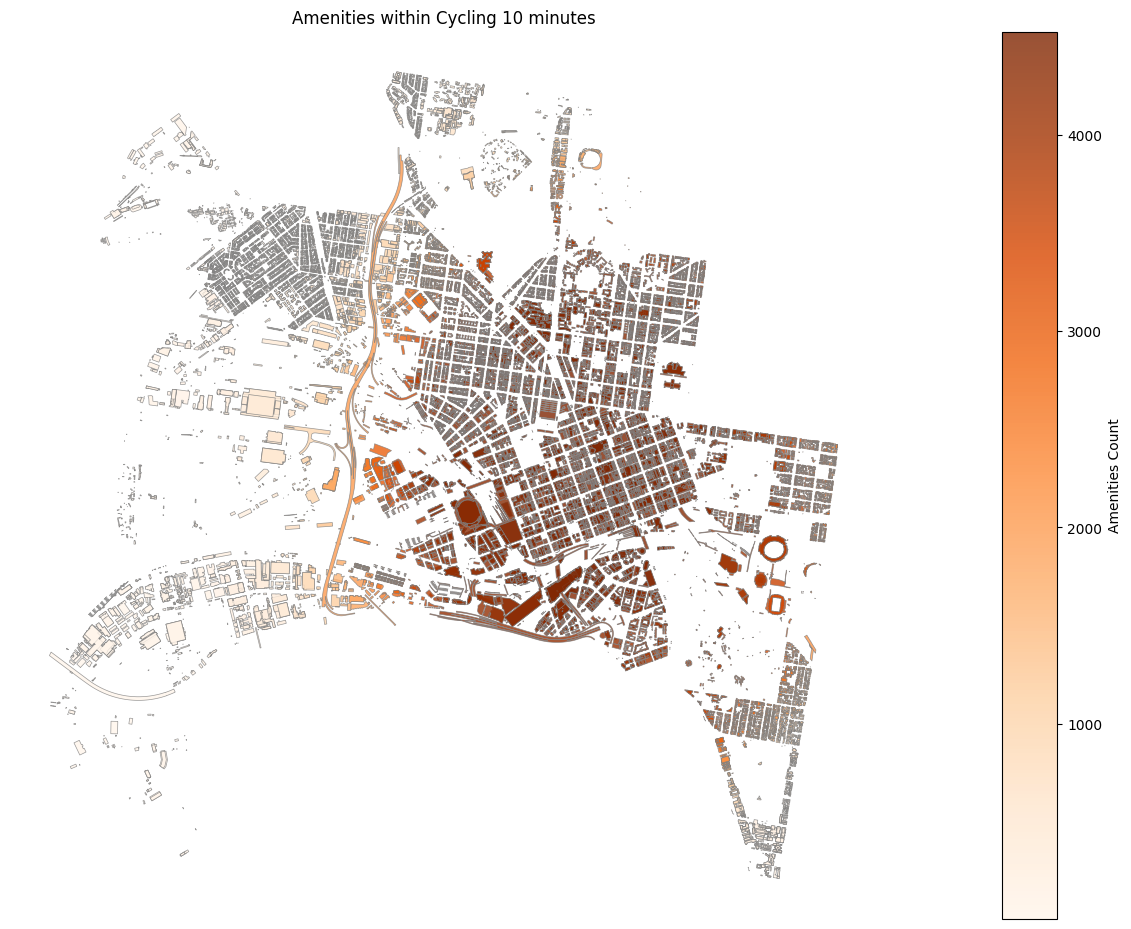

<ipython-input-58-cb01f34648be>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color)


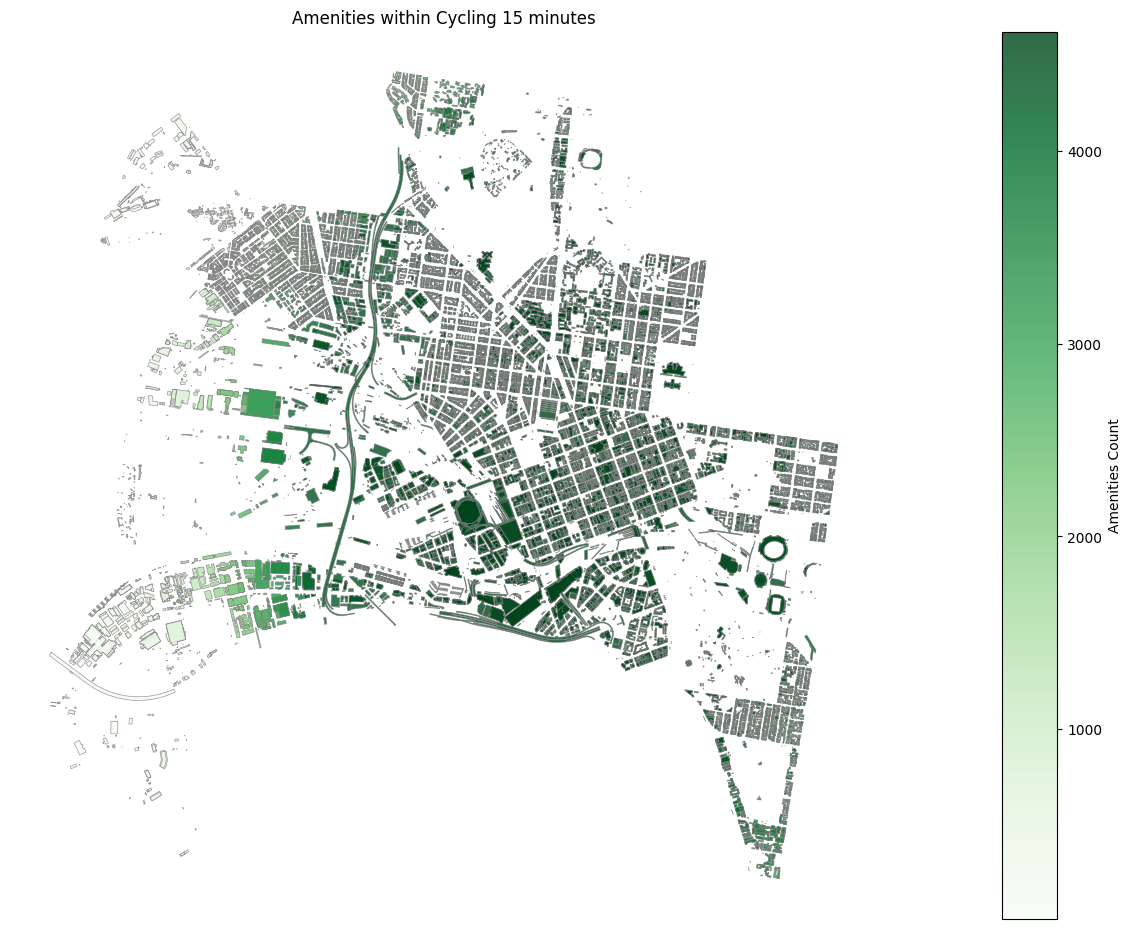

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

column_names = ['Cycling 5 minutes', 'Cycling 10 minutes', 'Cycling 15 minutes']
colors = ['Purples', 'Oranges', 'Greens']  # Change 'pink' to 'Greens'

for column_name, color in zip(column_names, colors):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Normalize the column values to a range of 0-1
    norm = plt.Normalize(amenities_df[column_name].min(), amenities_df[column_name].max())

    # Create a colormap for the column values with the specified gradient
    cmap = plt.cm.get_cmap(color)

    # Plot the amenities_df polygons with the color gradient based on the column values
    plot = amenities_df.plot(ax=ax, column=column_name, cmap=cmap, legend=False, linewidth=0.5, edgecolor='grey', alpha=0.8)

    # Set title and turn off axis
    ax.set_title(f"Amenities within {column_name}")
    ax.set_axis_off()

    # Create a colorbar and adjust its size using shrink
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(plot.get_children()[0], cax=cax, shrink=0.5) # Change shrink value to make the legend smaller
    cbar.ax.set_ylabel('Amenities Count')

    # Show the plot
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

def km_to_degrees(km, latitude):
    earth_radius = 6371.01 * np.cos(np.radians(latitude))
    return km / (earth_radius * np.pi / 180)

distance_list = [('Walking 5 minutes', 0.042), ('Walking 10 minutes', 0.083), ('Walking 15 minutes', 0.125)]

gdf = gdf.to_crs("EPSG:4326")
ggdf = ggdf.to_crs("EPSG:4326")
kkdf = kkdf.to_crs("EPSG:4326")

all_poi = pd.concat([ggdf, kkdf])

amenitiesw_df = gdf.copy()

for col_name, distance_km in distance_list:
    amenitiesw_df[col_name] = 0

for index, row in amenitiesw_df.iterrows():
    centroid = row.geometry.centroid
    latitude = centroid.y

    for col_name, distance_km in distance_list:
        buffer = centroid.buffer(km_to_degrees(distance_km, latitude))
        count = all_poi[all_poi.intersects(buffer)].shape[0]
        amenitiesw_df.at[index, col_name] = count

amenitiesw_df.head()


geo_point_2d property_id structure_id  \
0  {'lon': 144.9669486612548, 'lat': -37.81150694...      109953       812667   
1  {'lon': 144.96675041712277, 'lat': -37.8112172...      105685       818563   
2  {'lon': 144.96674141511818, 'lat': -37.8111976...      105685       818563   
3  {'lon': 144.99047343448228, 'lat': -37.8119959...      104550       805412   
4  {'lon': 144.99072530059686, 'lat': -37.8118892...      104870       813385   

                                            geometry  Cycling 5 minutes  \
0  MULTIPOLYGON (((144.96706 -37.81155, 144.96700...                  0   
1  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...                  0   
2  MULTIPOLYGON (((144.96682 -37.81125, 144.96676...                  0   
3  MULTIPOLYGON (((144.99052 -37.81198, 144.99044...                  0   
4  MULTIPOLYGON (((144.99074 -37.81186, 144.99072...                  0   

   Walking 5 minutes  Cycling 10 minutes  Cycling 15 minutes  
0                 23                  62                 171  
1                 12                  69                 175  
2                  0                  69                 174  
3                  0                   0                   0  
4                  0                   0                   0

In [ ]:
amenitiesw_df

<ipython-input-61-69a8e593db1c>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color)


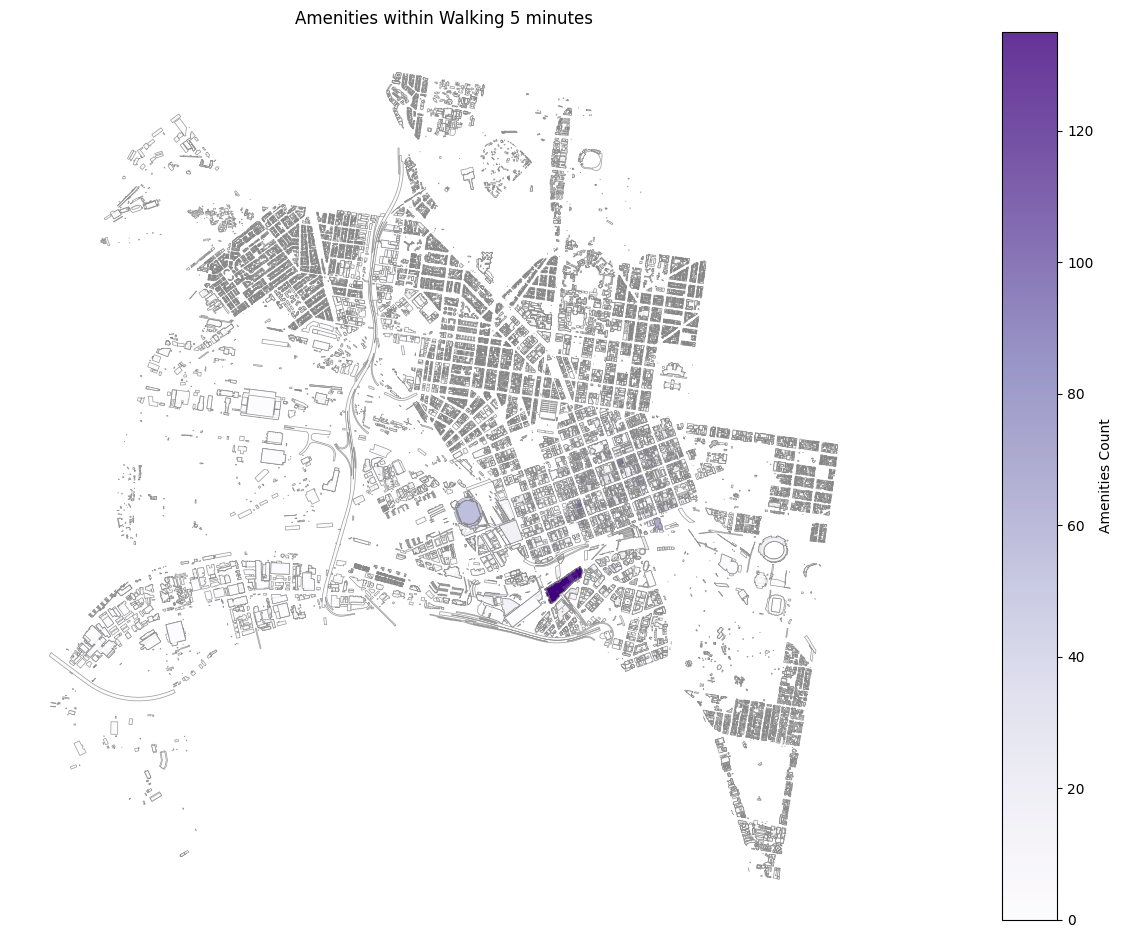

<ipython-input-61-69a8e593db1c>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color)


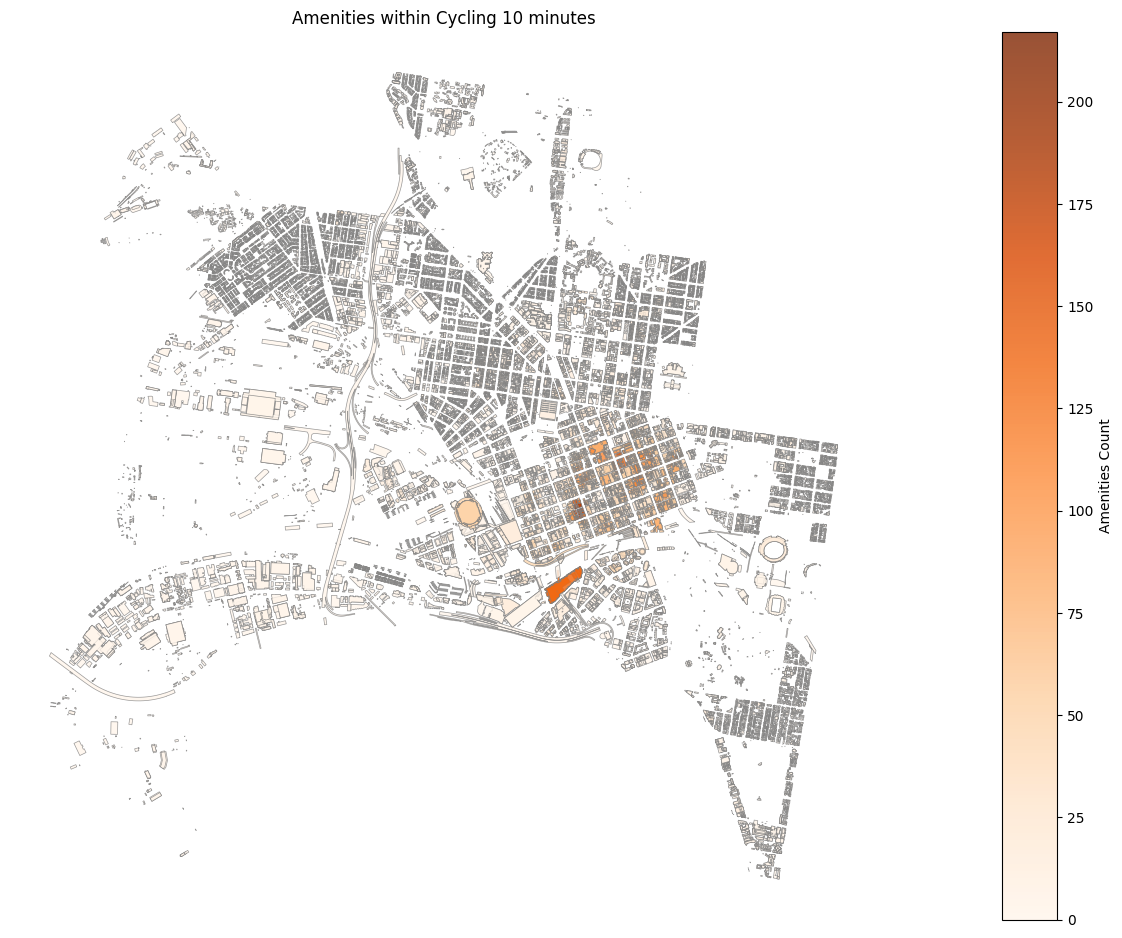

<ipython-input-61-69a8e593db1c>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color)


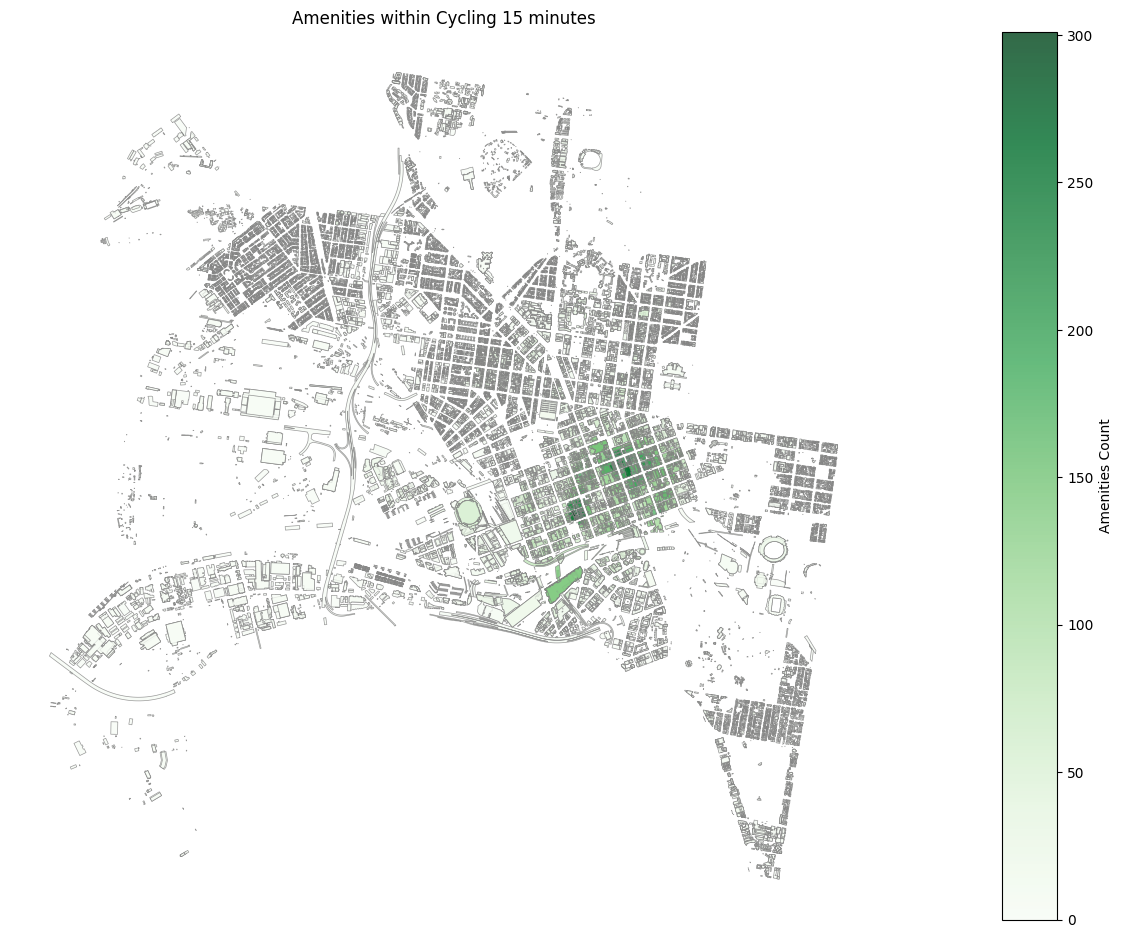

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

column_names = ['Walking 5 minutes', 'Cycling 10 minutes', 'Cycling 15 minutes']
colors = ['Purples', 'Oranges', 'Greens']  # Change 'pink' to 'Greens'

for column_name, color in zip(column_names, colors):
    fig, ax = plt.subplots(figsize=(15, 15))

    # Normalize the column values to a range of 0-1
    norm = plt.Normalize(amenitiesw_df[column_name].min(), amenitiesw_df[column_name].max())

    # Create a colormap for the column values with the specified gradient
    cmap = plt.cm.get_cmap(color)

    # Plot the amenities_df polygons with the color gradient based on the column values
    plot = amenitiesw_df.plot(ax=ax, column=column_name, cmap=cmap, legend=False, linewidth=0.5, edgecolor='grey', alpha=0.8)

    # Set title and turn off axis
    ax.set_title(f"Amenities within {column_name}")
    ax.set_axis_off()

    # Create a colorbar and adjust its size using shrink
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(plot.get_children()[0], cax=cax, shrink=0.5) # Change shrink value to make the legend smaller
    cbar.ax.set_ylabel('Amenities Count')

    # Show the plot
    plt.show()


# SEGMENT AREAS

In [ ]:
# Merge the two dataframes on the 'property_id' column
merged_gdf = gdf.merge(pldf, on='property_id')

# Create a colormap for the unique 'clue_small_area' values
unique_areas = np.unique(merged_gdf['clue_small_area'])
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_areas))))

# Map 'clue_small_area' values to indices
area_to_idx = {area: idx for idx, area in enumerate(unique_areas)}

# Create a dictionary to map 'clue_small_area' values to colors
color_dict = {area: cmap(idx / len(unique_areas)) for area, idx in area_to_idx.items()}

# Set the figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(15, 15))
for area in unique_areas:
    area_gdf = merged_gdf[merged_gdf['clue_small_area'] == area]
    color = color_dict[area]
    area_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor=color)

# Create custom legend entries with circular markers
legend_circles = [Line2D([0], [0], marker='o', color='w', label=area, markerfacecolor=color, markersize=10)
                  for area, color in color_dict.items()]

# Show the legend with custom entries and position it next to the plot
plt.legend(handles=legend_circles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()



In [ ]:
# Merge the two dataframes on the 'property_id' column
merged_gdf = gdf.merge(pldf, on='property_id')

# Create a colormap for the unique 'clue_small_area' values
unique_areas = np.unique(merged_gdf['clue_small_area'])
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_areas))))

# Map 'clue_small_area' values to indices
area_to_idx = {area: idx for idx, area in enumerate(unique_areas)}

# Create a dictionary to map 'clue_small_area' values to colors
color_dict = {area: cmap(idx / len(unique_areas)) for area, idx in area_to_idx.items()}

# Define the number of rows and columns for the grid of subplots
n_rows = int(np.ceil(np.sqrt(len(unique_areas))))
n_cols = int(np.ceil(len(unique_areas) / n_rows))

# Create a grid of subplots with the specified figure size (width, height) in inches
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15), sharex=True, sharey=True)

# Remove extra subplots if the grid is not completely filled
if n_rows * n_cols > len(unique_areas):
    for ax in axes.flat[len(unique_areas):]:
        ax.remove()

# Create an empty dictionary to store the separated GeoDataFrames
area_gdfs = {}

# Plot each 'clue_small_area' individually and create separate GeoDataFrames
for idx, (area, ax) in enumerate(zip(unique_areas, axes.flat)):
    area_gdf = merged_gdf[merged_gdf['clue_small_area'] == area]
    area_gdfs[area] = area_gdf  # Store the GeoDataFrame in the dictionary
    color = color_dict[area]
    area_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor=color)
    ax.set_title(area)

# Set a common title for all subplots
fig.suptitle("Geometries by 'clue_small_area'", fontsize=16, y=1.02)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


# LANDUSE

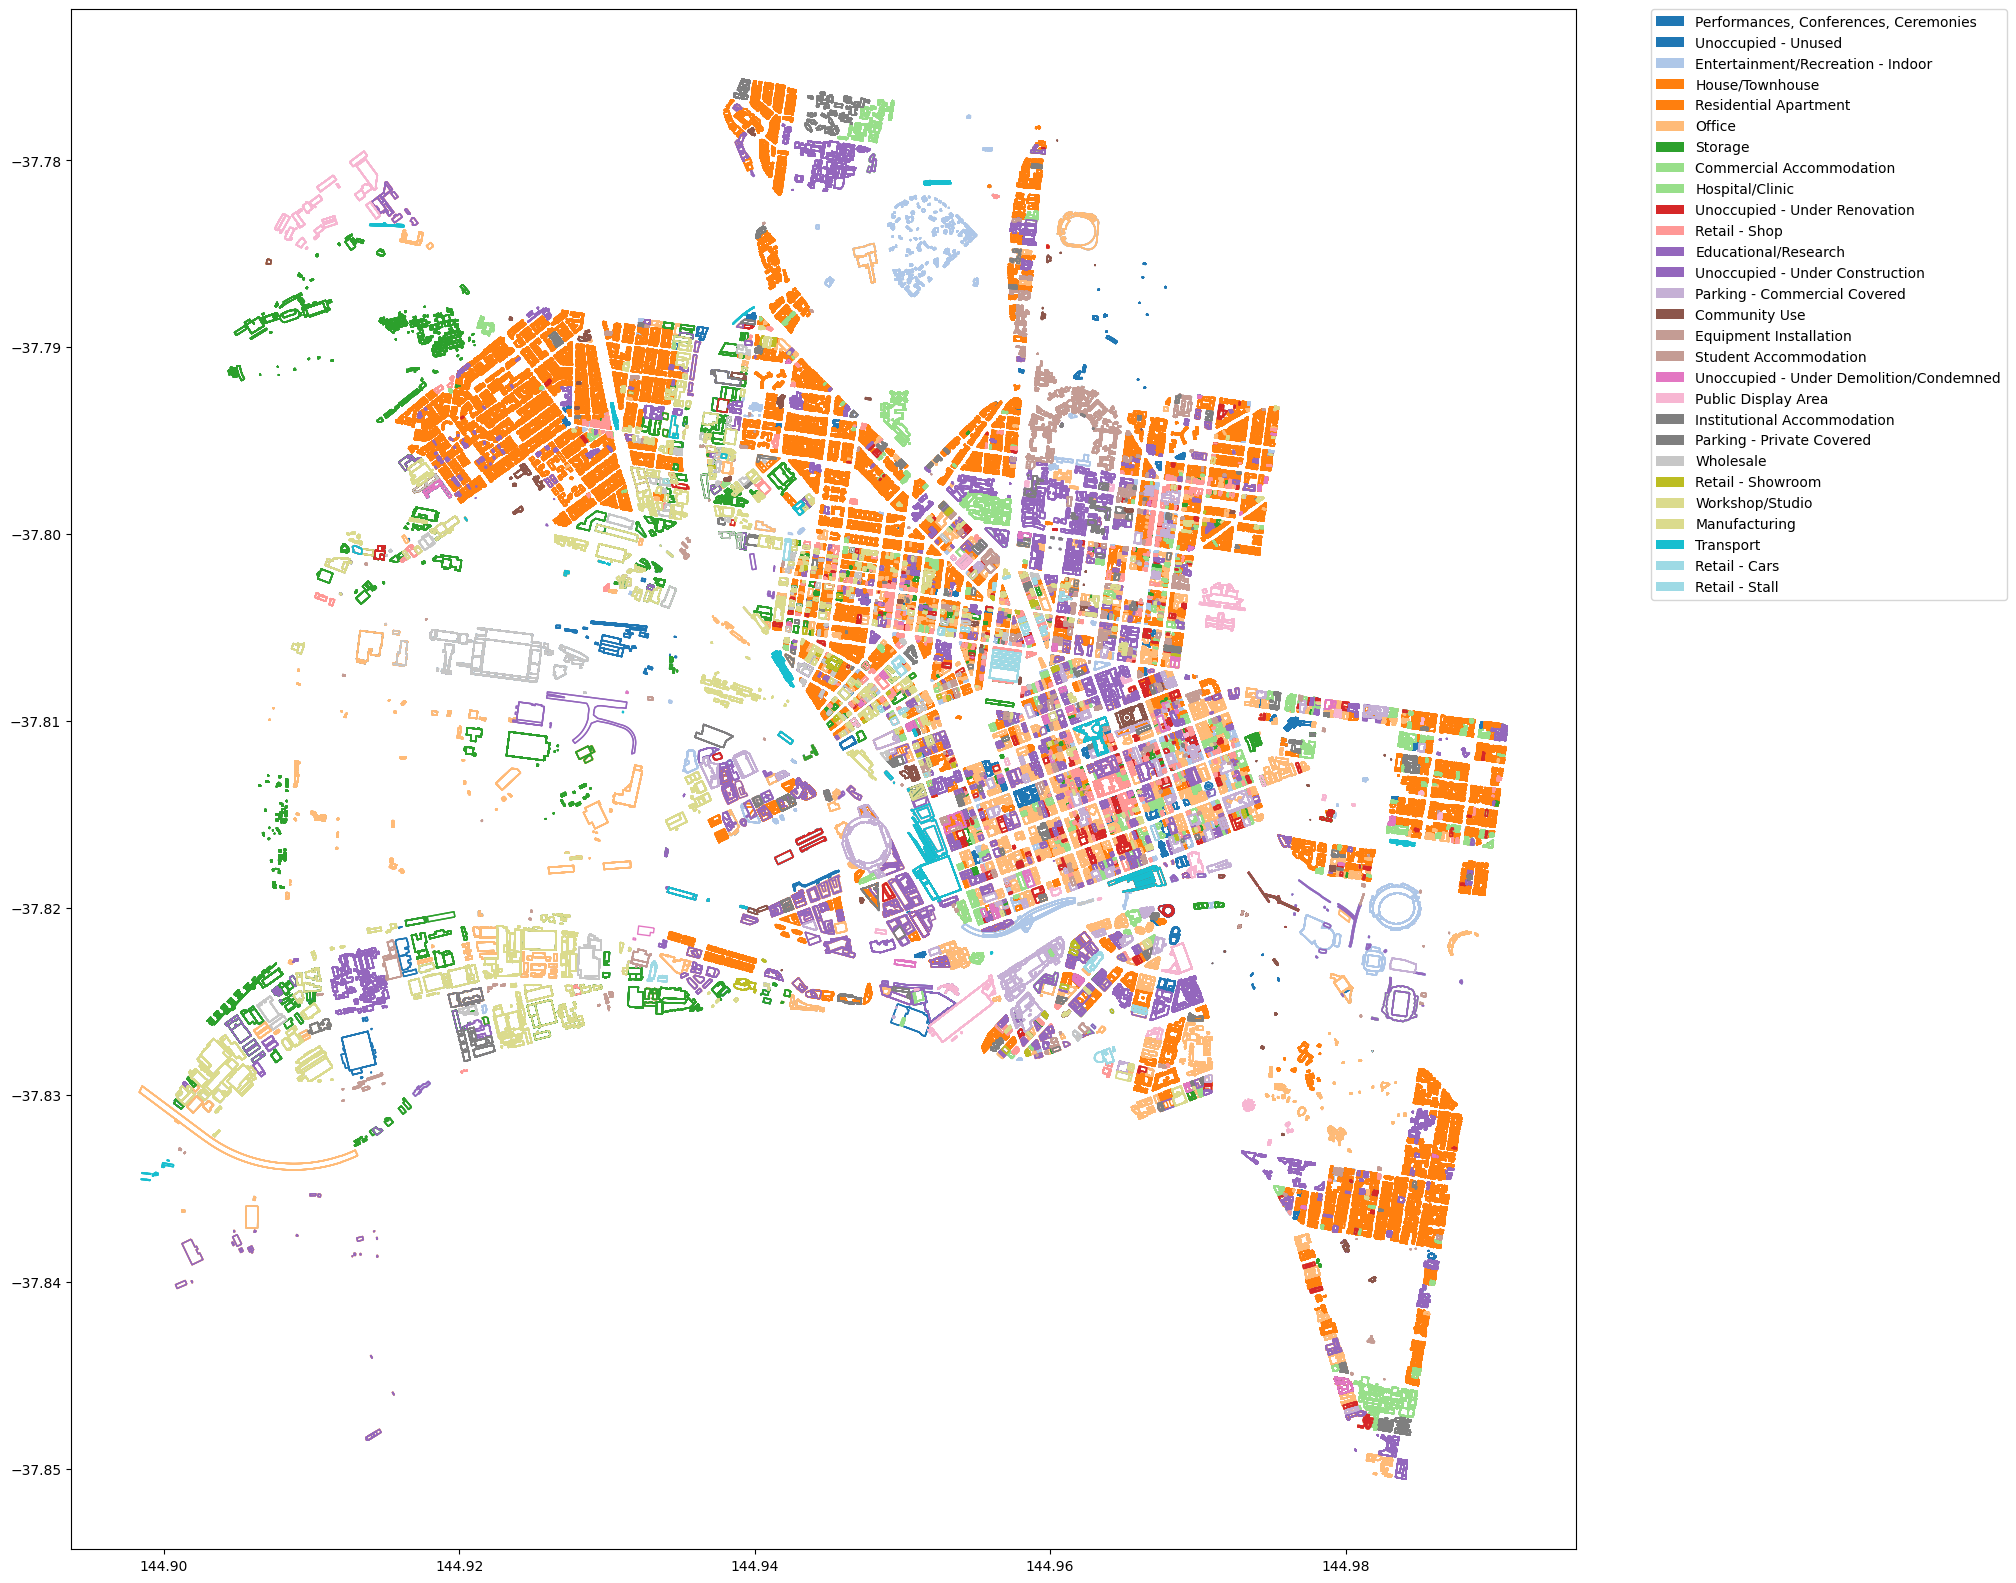

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Merge the two dataframes on the 'property_id' column
merged_gdf = gdf.merge(pldf, on='property_id')

# Create a colormap for the unique 'predominant_space_use' values
unique_space_use = merged_gdf['predominant_space_use'].unique()
cmap = ListedColormap(plt.cm.tab20(np.linspace(0, 1, len(unique_space_use))))

# Map 'predominant_space_use' values to indices
space_use_to_idx = {space_use: idx for idx, space_use in enumerate(unique_space_use)}

# Create a dictionary to map 'predominant_space_use' values to colors
color_dict = {space_use: cmap(idx / len(unique_space_use)) for space_use, idx in space_use_to_idx.items()}

# Set the figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(20, 20))
for space_use in unique_space_use:
    space_use_gdf = merged_gdf[merged_gdf['predominant_space_use'] == space_use]
    color = color_dict[space_use]
    space_use_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor=color, label=space_use)

# Create legend patches
legend_patches = [Patch(facecolor=color_dict[space_use], label=space_use) for space_use in unique_space_use]

# Show the legend with circle patches and position it next to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()


# KPIS

In [ ]:
merged_df

census_year  block_id property_id               clue_small_area  \
0             2012       435      101564  West Melbourne (Residential)   
6             2003       435      101564  West Melbourne (Residential)   
40            2013       257      105523                       Carlton   
44            2004       257      105523                       Carlton   
80            2017       257      105523                       Carlton   
...            ...       ...         ...                           ...   
674328        2021       773      677813                     Docklands   
674340        2021       773      694330                     Docklands   
674348        2021       773      694345                     Docklands   
674354        2021       620      704479                East Melbourne   
674356        2021        78      580090               Melbourne (CBD)   

        predominant_space_use                accessibility_type  \
0             House/Townhouse  Not determined or not applicable   
6             House/Townhouse  Not determined or not applicable   
40        Unoccupied - Unused        Low level of accessibility   
44        Unoccupied - Unused        Low level of accessibility   
80      Student Accommodation       High level of accessibility   
...                       ...                               ...   
674328        House/Townhouse        Low level of accessibility   
674340        House/Townhouse  Not determined or not applicable   
674348        House/Townhouse  Not determined or not applicable   
674354  Residential Apartment       High level of accessibility   
674356                 Office  Not determined or not applicable   

        accessibility_rating  bicycle_spaces  longitude  latitude  ...  \
0                        0.0             0.0   144.9553  -37.8066  ...   
6                        0.0             0.0   144.9540  -37.8083  ...   
40                       1.0             0.0   144.9609  -37.8033  ...   
44                       1.0             0.0   144.9596  -37.8049  ...   
80                       3.0             0.0   144.9610  -37.8033  ...   
...                      ...             ...        ...       ...  ...   
674328                   1.0             0.0   144.9358  -37.8217  ...   
674340                   0.0             0.0   144.9348  -37.8215  ...   
674348                   0.0             0.0   144.9342  -37.8216  ...   
674354                   3.0           208.0   144.9817  -37.8096  ...   
674356                   0.0            56.0   144.9714  -37.8091  ...   

       footprint_extrusion footprint_min_elevation  structure_extrusion  \
0                      4.0                    27.5                  4.0   
6                      4.0                    27.5                  4.0   
40                     4.0                    26.5                  4.0   
44                     4.0                    26.5                  4.0   
80                     4.0                    26.5                  4.0   
...                    ...                     ...                  ...   
674328                 3.0                     7.0                  7.5   
674340                 4.5                     2.5                  4.5   
674348                 3.0                     6.5                  7.0   
674354                 4.0                    72.9                 44.9   
674356                 3.0                    69.5                 43.0   

                                                 geometry  \
0       MULTIPOLYGON (((144.95539 -37.80664, 144.95539...   
6       MULTIPOLYGON (((144.95539 -37.80664, 144.95539...   
40      MULTIPOLYGON (((144.96144 -37.80344, 144.96140...   
44      MULTIPOLYGON (((144.96144 -37.80344, 144.96140...   
80      MULTIPOLYGON (((144.96144 -37.80344, 144.96140...   
...                                                   ...   
674328  MULTIPOLYGON (((144.93586 -37.82171, 144.93586...   
674340  MULTIPOLYGON (((144.93484 -

# ACCESS

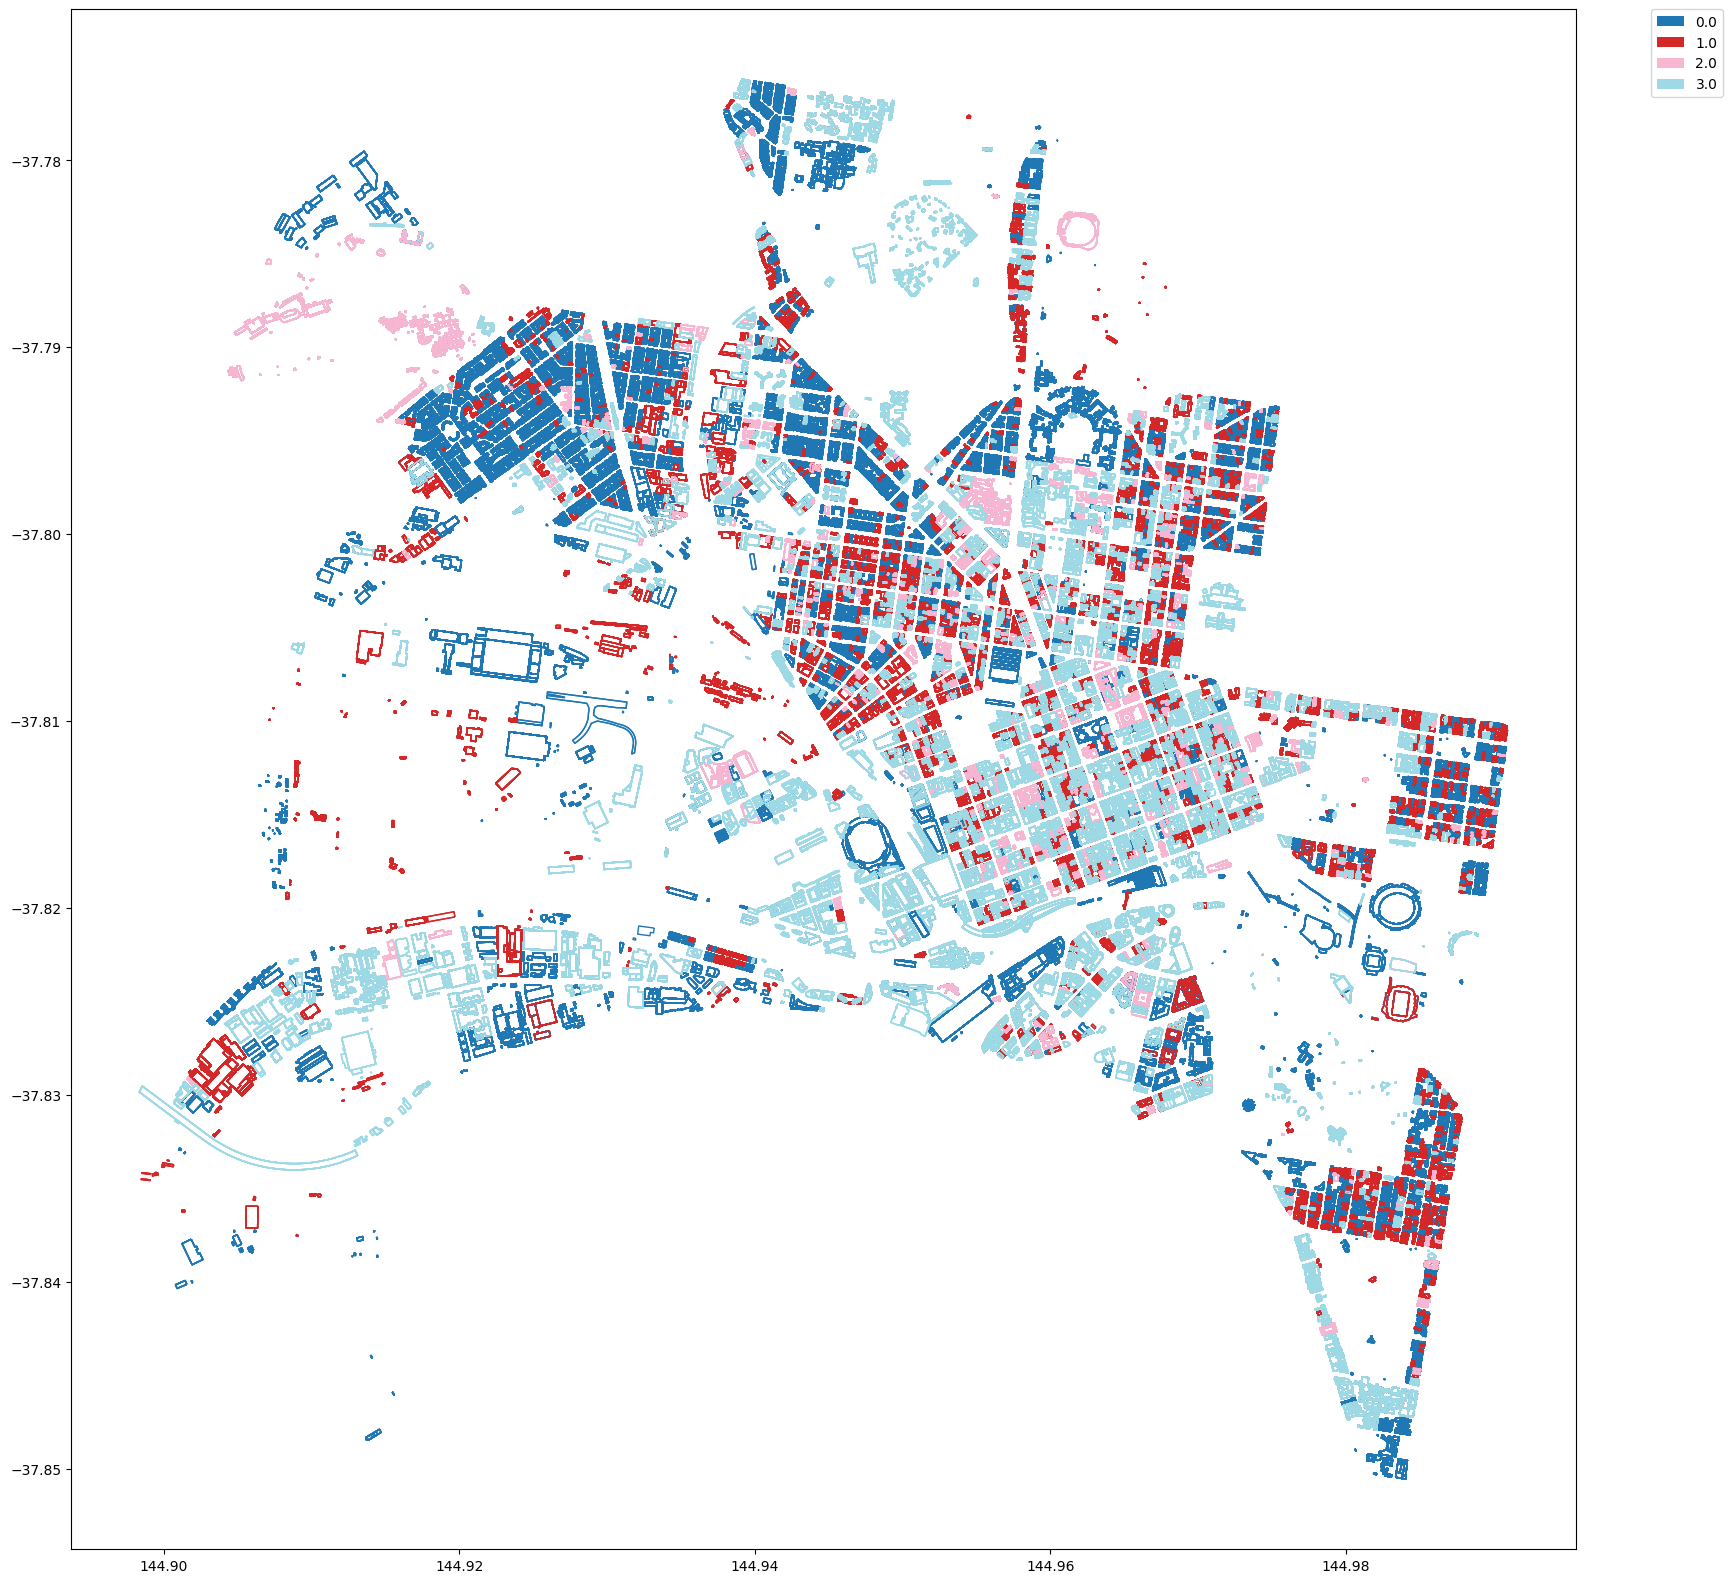

In [ ]:
# Create a colormap for the unique 'accessibility_rating' values
unique_ratings = merged_gdf['accessibility_rating'].unique()
cmap = ListedColormap(plt.cm.tab20(np.linspace(0, 1, len(unique_ratings))))

# Map 'accessibility_rating' values to indices
rating_to_idx = {rating: idx for idx, rating in enumerate(unique_ratings)}

# Create a dictionary to map 'accessibility_rating' values to colors
color_dict = {rating: cmap(idx / len(unique_ratings)) for rating, idx in rating_to_idx.items()}

# Set the figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(20, 20))
for rating in unique_ratings:
    rating_gdf = merged_gdf[merged_gdf['accessibility_rating'] == rating]
    color = color_dict[rating]
    rating_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor=color, label=rating)

# Create legend patches
legend_patches = [Patch(facecolor=color_dict[rating], label=rating) for rating in unique_ratings]

# Show the legend with circle patches and position it next to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()
